In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
random.seed(5)

In [3]:
Olist = np.array([0,1])
Tlist = np.array([0,1])
Clist = np.array([0,1])
Hlist = np.array([0,1])
Elist = np.array([0,1])
Glist = np.array(['A','B','C','D','F'])

In [4]:
Oprob = np.array([0.7,0.3])
Tprob = np.array([0.45,0.55])
Cprob = np.array([0.2,0.8])

In [5]:
def randomize(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob):
    
    # O,T,C
    O = np.random.choice(Olist, size=None, replace=True, p=Oprob)
    T = np.random.choice(Tlist, size=None, replace=True, p=Tprob)
    C = np.random.choice(Tlist, size=None, replace=True, p=Cprob)

    # H
    if C==0:
        Hprob = [0.75,0.25]
    elif C==1:
        Hprob = [0.2,0.8]
    H = np.random.choice(Hlist, size=None, replace=True, p=Hprob)

    # E
    if T==0 and C==0 and O==0:
        Eprob = [0.85,0.15]
    elif T==0 and C==0 and O==1:
        Eprob = [0.8,0.2]
    elif T==0 and C==1 and O==0:
        Eprob = [0.4,0.6]
    elif T==0 and C==1 and O==1:
        Eprob = [0.3,0.7]
    elif T==1 and C==0 and O==0:
        Eprob = [0.6,0.4]
    elif T==1 and C==0 and O==1:
        Eprob = [0.5,0.5]
    elif T==1 and C==1 and O==0:
        Eprob = [0.15,0.85]
    elif T==1 and C==1 and O==1:
        Eprob = [0.1,0.9]
    E = np.random.choice(Elist, size=None, replace=True, p=Eprob)

    # G
    if E==0 and H==0:
        Gprob = [0.05,0.05,0.1,0.2,0.6]
    elif E==0 and H==1:
        Gprob = [0.1,0.3,0.3,0.2,0.1]
    elif E==1 and H==0:
        Gprob = [0.1,0.3,0.3,0.2,0.1]
    elif E==1 and H==1:
        Gprob = [0.6,0.2,0.1,0.05,0.05]
    G = np.random.choice(Glist, size=None, replace=True, p=Gprob)
    
    #return sample
    return np.array([O, T, C, H, E, G])

In [31]:
def countC1(samples):
    count = 0
    for j in range(len(samples)):
        if samples[j][2]=='1' and samples[j][0]=='1' and samples[j][-1]=='B':
            count = count + 1
    return count

In [71]:
def simulation(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob):
    
    samples = []
    C1s_ratio_list=[]
    #seed = 45 
    badIndexes = []   
    for i in range(1,10001):
        
        sample = randomize(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob)
        samples.append(sample)
        count_valid = 1
        count_Cs = 0
        for j in range(len(samples)):
            if samples[j][0]=='1' and samples[j][-1]=='B':
                count_valid = count_valid+1
                if samples[j][0]=='1' and samples[j][-1]=='B' and samples[j][2]=='1':
                    count_Cs = count_Cs+1
                    
        C1s_ratio = count_Cs/float(i)
        C1s_ratio_list.append(C1s_ratio)
        
    plt.plot(range(1,10001),C1s_ratio_list)
    plt.show()
    
    print len(samples)
    return 1


    """badIndexes = []
    
    for j in range(len(samples)):
        if samples[j][0]!='1' or samples[j][-1]!='B':
            badIndexes.append(j)
        
    #delete rows of samples that do not match observed data
    
    badIndexes = sorted(badIndexes)
    badIndexes = reversed(badIndexes)
    
    for index in (badIndexes):
        del samples[index]
        
    return samples"""

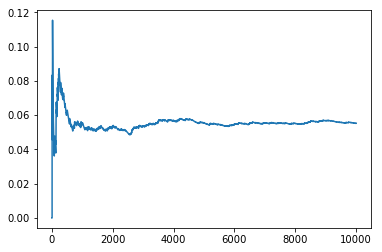

10000


In [72]:
samples = simulation(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob)

In [66]:
len(samples)

TypeError: object of type 'int' has no len()

In [10]:
countC1(samples)

0.8552437223042836

In [11]:
result = countC1(samples) / 616.0
result

0.0013883826660783824

In [12]:
#GIBBS SAMPLING
#initialize
T='1'
C='1'
E='1'
H='1'
O='1'
G='B'

def gibbsSampling(samples,T,C,E,H,O,G):
    samples2 = copy.deepcopy(samples)
    badIndexesT = []
    for j in range(len(samples2)):
        if samples2[j][0]!=O or samples2[j][2]!=C or samples2[j][3]!=H or samples2[j][4]!=E or samples2[j][-1]!=G:
            badIndexesT.append(j)
    badIndexesT = sorted(badIndexesT)
    badIndexesT = reversed(badIndexesT)
    for index in (badIndexesT):
        del samples2[index]

    countT = 0
    for k in range(len(samples2)):
        if samples2[k][1]=='1':
            countT = countT + 1
    
    T_ratio = countT/float(len(samples2))
    Tnew = '1' if T_ratio>0.5 else '0'
    
    samples3 = copy.deepcopy(samples)

    badIndexesC = []
    for j in range(len(samples3)):
        if samples3[j][0]!=O or samples3[j][1]!=Tnew or samples3[j][3]!=H or samples3[j][4]!=E or samples3[j][-1]!=G:
            badIndexesC.append(j)
    badIndexesC = sorted(badIndexesC)
    badIndexesC = reversed(badIndexesC)

    for index in (badIndexesC):
        del samples3[index]
    
    countC = 0
    for k in range(len(samples3)):
        if samples3[k][2]=='1':
            countC = countC + 1
    
    C_ratio = countC/float(len(samples3))
    Cnew = '1' if C_ratio>0.5 else '0'
    
    samples4 = copy.deepcopy(samples)
    badIndexesE = []
    for j in range(len(samples4)):
        if samples4[j][0]!=O or samples4[j][1]!=Tnew or samples4[j][2]!=Cnew or samples4[j][3]!=H or samples4[j][-1]!=G:
            badIndexesE.append(j)
    badIndexesE = sorted(badIndexesE)
    badIndexesE = reversed(badIndexesE)
    for index in (badIndexesE):
        del samples4[index]
        
    countE = 0
    for k in range(len(samples4)):
        if samples4[k][4]=='1':
            countE = countE + 1
            
    E_ratio = countE/float(len(samples4))
    Enew = '1' if E_ratio>0.5 else '0'
    
    samples5 = copy.deepcopy(samples)
    badIndexesH = []
    for j in range(len(samples4)):
        if samples5[j][0]!=O or samples5[j][1]!=Tnew or samples5[j][2]!=Cnew or samples5[j][4]!=Enew or samples5[j][-1]!=G:
            badIndexesH.append(j)
    badIndexesH = sorted(badIndexesH)
    badIndexesH = reversed(badIndexesH)
    for index in (badIndexesH):
        del samples5[index]
        
    countH = 0
    for k in range(len(samples5)):
        if samples5[k][3]=='1':
            countH = countH + 1
            
    H_ratio = countH/float(len(samples5))
    Hnew = '1' if E_ratio>0.5 else '0'
    
    return (Tnew, Cnew, Enew, Hnew)


In [13]:
new(samples,T,C,E,H,O,G)

NameError: name 'new' is not defined

In [14]:
T='1'
C='1'
E='1'
H='1'
O='1'
G='B'

for k in range (1, 1000):
    Tnew, Cnew, Enew, Hnew = new(samples,T,C,E,H,O,G)
    T  = Tnew
    C = Cnew
    E = Enew
    H = Hnew
    
T,C,E,H

NameError: name 'new' is not defined

In [15]:
Ci = '1'
Ei = '1'
Hi = '1'
O = '1'
G = 'B'

def gibbsSampling(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob):
    Tnew = np.random.choice(Tlist, size=None, replace=True, p=Tprob)
    Cnew = np.random.choice(Tlist, size=None, replace=True, p=Cprob)
    Eprobgibbs = None
    if Tnew == '0' and Cnew == '0':
        Eprobgibbs = [0.8,0.2]
    elif Tnew=='0' and Cnew=='1':
        Eprobgibbs = [0.3,0.7]
    elif Tnew=='1' and Cnew=='0':
        Eprobgibbs = [0.5,0.5]
    elif Tnew=='1' and Cnew=='1':
        Eprobgibbs = [0.1,0.9]
    Enew = np.random.choice(Elist, size=None, replace=True, p=Eprobgibbs)

    Hprobgibbs = [0.2,0.8]
    Hnew = np.random.choice(Hlist, size=None, replace=True, p=Hprobgibbs)
    
    return (Tnew,Cnew,Enew,Hnew)

    
    

In [19]:
def gibbssimulation(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob):
    Ti = '1'
    Ci = '1'
    Ei = '1'
    Hi = '1'
    O = '1'
    G = 'B'
    samples=[]
    C1s_ratios=[]
    for i in range (1, 10001):
        Ti,Ci,Ei,Hi = gibbsSampling(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob)
        sample = np.array([Ti,Ci,Ei,Hi,'1','B'])
        samples.append(sample)
        
        count = 0
        for j in range(len(samples)):
            if samples[j][1]=='1':
                count = count + 1
        ratio = count/float(i)
        C1s_ratios.append(ratio)
                
    print count
        
    plt.plot(range(1,10001),C1s_ratios)
    plt.show()
    print C1s_ratios
    return samples
    

8039


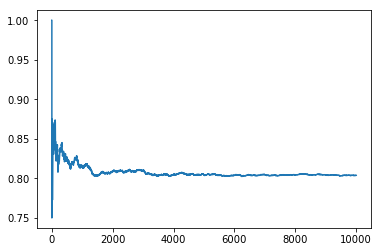

[1.0, 1.0, 1.0, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.7777777777777778, 0.8, 0.8181818181818182, 0.8333333333333334, 0.8461538461538461, 0.8571428571428571, 0.8, 0.8125, 0.8235294117647058, 0.8333333333333334, 0.8421052631578947, 0.8, 0.8095238095238095, 0.7727272727272727, 0.782608695652174, 0.7916666666666666, 0.8, 0.8076923076923077, 0.8148148148148148, 0.8214285714285714, 0.8275862068965517, 0.8333333333333334, 0.8387096774193549, 0.84375, 0.8484848484848485, 0.8529411764705882, 0.8571428571428571, 0.8611111111111112, 0.8648648648648649, 0.8421052631578947, 0.8461538461538461, 0.85, 0.8536585365853658, 0.8333333333333334, 0.8372093023255814, 0.8409090909090909, 0.8444444444444444, 0.8478260869565217, 0.851063829787234, 0.8541666666666666, 0.8571428571428571, 0.86, 0.8627450980392157, 0.8461538461538461, 0.8490566037735849, 0.8518518518518519, 0.8363636363636363, 0.8392857142857143, 0.8421052631578947, 0.8448275862068966, 0.8305084745762712, 0.8333333333333334,

[array(['1', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '0', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '0', '0', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '0', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '0', '0', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '0', '0', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '1', '1', 'B'], 
       dtype='|S11'), array(['0', '0', '0', '1', '1', 'B'], 
       dtype='|S11'), array(['1', '1', '0', '0', '1', 'B'], 
       dtype='|S11'), array(['0', '1', '1', '

In [20]:
gibbssimulation(Olist,Tlist,Clist,Hlist,Elist,Glist,Oprob,Tprob,Cprob)